## Binary search on 2D array

### Find rows with maximum number of 1's
Consider a matrix with 0's and 1's  
[0 0 1 1 1]  
[0 0 0 0 0]  
[0 1 1 1 1]  
[0 0 0 0 0]  
[0 1 1 1 1]  

Every row of the matrix is sorted. We have to find out which row contains the maximum number of 1's, if two contains same number of 1's return the least index.

0 - [0 0 1 1 1] - 3 1's  
1 - [0 0 0 0 0] - 0 1's  
2 - [0 1 1 1 1] - 4 1's  
3 - [0 0 0 0 0] - 0 1's  
4 - [0 1 1 1 1] - 4 1's  

Index 2 and 4 have max 1's so we them, 2 is smaller so we take 2 as the answer

In [8]:
# Linear search
mat = [[0,0,1,1,1],
        [0,0,0,0,0],
        [0,1,1,1,1],
        [0,0,0,0,0],
        [0,1,1,1,1]]

ind = -1
max1s = -1
for i in range(len(mat)):
    rowcnt = 0
    for j in range(len(mat[i])):
        rowcnt += mat[i][j]
    if rowcnt > max1s:
        max1s = rowcnt
        ind = i
print(ind, max1s) 
# Time complexity: O(nxm)
# Space complexity: O(1)

2 4


Consider one particular row of the matrix  
[0,0,1,1,1]  
We have to find out which is the first 1. Here the first 1 is at index 2, size of row is 5. To number of 1's is 5-2 = 3

We can find first 1 by lower bound

In [11]:
# Using binary search on each row
ind = -1
max1s = -1
for i in range(len(mat)):
    ind1 = len(mat[i])
    low = 0
    high = len(mat[i])-1
    while low<=high:
        mid = int((low+high)/2)
        if mat[i][mid] >= 1:
            ind1 = mid
            high = mid-1
        else:
            low = mid+1
    
    rowcnt = len(mat[i]) - ind1
    if rowcnt > max1s:
        max1s = rowcnt
        ind = i
print(ind, max1s)
# Time complexity: O(n x log(m))
# Space complexity: O(1)


2 4


### Search in 2D array
Consider the matrix:  
[[3, 4, 7, 9],  
[12, 13, 16, 18],  
[20, 21, 23, 29]]  

target = 23  
We have to find out whether the target is in the matrix or not

In [2]:
# linear search
mat = [[3, 4, 7, 9],
       [12, 13, 16, 18],
       [20, 21, 23, 29]]
target = 23
def searchin2d(mat, target):
    for i in range(len(mat)):
        for j in range(len(mat[i])):
            if mat[i][j] == target:
                return True
    return False

print(searchin2d(mat, target))
# Time complexity: O(n x m)
# Space complexity: O(1)

True


Consider each row one at a time and check if the target lies between first element of the row and last element of the row

If we see, the matrix is sorted in itself,We flatten the 2D matrix into 1D

[[3, 4, 7, 9],  
[12, 13, 16, 18],  
[20, 21, 23, 29]]    

[3, 4, 7, 9, 12, 13, 16, 18, 20, 21, 23, 29]  
The starting index is 0 and ending is 11

To map 1D coordinate to 2D coordinate  

ind -> row = ind/m  
ind -> col = ind%m

Consider the matrix with 1D coordinates  
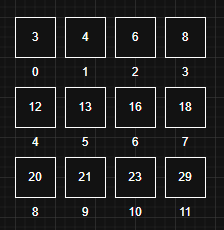

We can see that first element of each is multiple of 4(no. of columns = m), if we divide the ind by the number of columns we will get the row number and reminder will give which column.

In [ ]:
# binary search
def binary2d(mat, target):
    n = len(mat)
    m = len(mat[0])
    low = 0
    high = (n*m) - 1
    while low<=high:
        mid = int((low+high)/2)
        row = int(mid/m)
        col = int(mid%m)
        if mat[row][col] == target:
            return True
        elif mat[row][col] < target:
            low = mid+1
        else:
            high = mid-1
    return False

print(binary2d(mat, target))
# Time complexity: O(log n x m)
# Space complexity: O(1)

True


### Search in a row and column wise sorted matrix
Consider a matrix  
[[1, 4, 7, 11, 15],  
[2, 5, 8, 12, 19],  
[3, 6, 9, 16, 22],  
[10, 13, 14, 17, 24],  
[18, 21, 23, 26, 30]]  

target = 14, we have find where the target is located (co-ordinates). Here 14 is at [3, 2].

The matrix is sorted in each row and sorted in each column individually.

In [8]:
# Linear search
def searchin2d(mat, target):
    for i in range(len(mat)):
        for j in range(len(mat[0])):
            if mat[i][j] == target:
                return [i,j]        
    return [-1,-1]


mat = [[1, 4, 7, 11, 15],  
        [2, 5, 8, 12, 19],  
        [3, 6, 9, 16, 22],  
        [10, 13, 14, 17, 24],  
        [18, 21, 23, 26, 30]]
target = 14

print(searchin2d(mat, target))
# Time complexity: O(n x m)
# Space complexity: O(1)

[3, 2]


Each row in the matrix is sorted, so we can apply the binary search on each row.

Consider the matrix

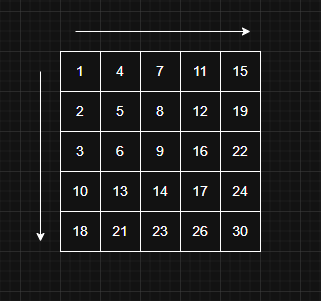

If we stand at mat[0][0], it is increasing both row and column wise.

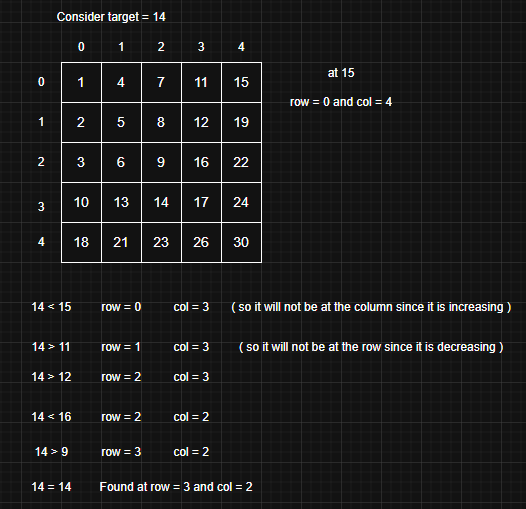
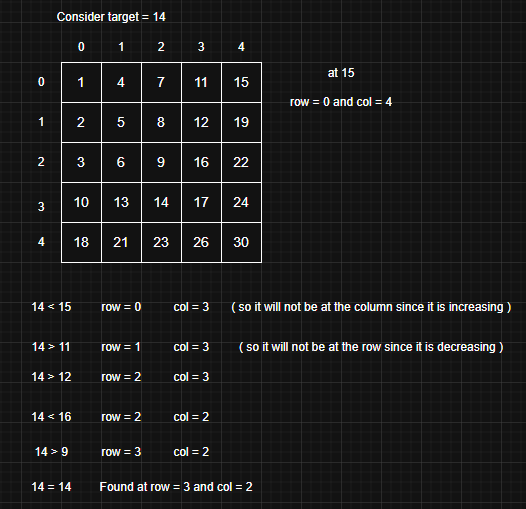

In [10]:
# Binary search
def binarysearch2d(mat, target):
    row = 0
    col = len(mat[0]) - 1
    while row < len(mat) and col >= 0:
        # rows range from top to bottom (0 -> n)
        # cols range from right to left (m -> 0)
        if mat[row][col] == target:
            return [row, col]
        elif mat[row][col] > target:
            col-=1 # go left
        else:
            row+=1 # go down
    return [-1, -1]

print(binarysearch2d(mat, target))
# Time complexity: O(n + m) we are moving one corner to opposite corner, we go n steps down and m left
# Space complexity: O(1)


[3, 2]


### Peak element in 2D matrix
Consider a 2D array  
[[4, 2, 5, 1, 4, 5],    
[2, 9, 3, 2, 3, 2],  
[1, 7, 6, 0, 1, 3],  
[3, 6, 2, 3, 7, 2]  
]  

In this 2D array, none of the 2 adjacent cell are same. We have to find peak element. A peak element is greater than its left counter part and greater than it's right left counter part. In 2D matrix the element is greater than it's top and down counter part's also.


In [5]:
# Linear search
mat = [[4, 2, 5, 1, 4, 5],    
        [2, 9, 3, 2, 3, 2],  
        [1, 7, 6, 0, 1, 3],  
        [3, 6, 2, 3, 7, 2]]

peak = -1

for i in range(len(mat)):
    for j in range(len(mat[0])):
        if i==0 and j==0:
            if mat[i][j] > mat[i+1][j] and mat[i][j] > mat[i][j+1]:
                peak = max(peak,mat[i][j])
        elif i==0 and j== len(mat[0])-1:
            if mat[i][j] > mat[i+1][j] and mat[i][j] > mat[i][j-1]:
                peak = max(peak,mat[i][j])
        elif i == len(mat)-1 and j== len(mat[0])-1:
            if mat[i][j] > mat[i-1][j] and mat[i][j] > mat[i][j-1]:
                peak = max(peak,mat[i][j])
        elif i == len(mat)-1 and j== 0:
            if mat[i][j] > mat[i-1][j] and mat[i][j] > mat[i][j+1]:
                peak = max(peak,mat[i][j])
        elif i==0:
             if mat[i][j] > mat[i+1][j] and mat[i][j] > mat[i][j+1] and mat[i][j] > mat[i][j-1]:
                peak = max(peak,mat[i][j])
        elif j==0:
             if mat[i][j] > mat[i+1][j] and mat[i][j] > mat[i][j+1] and mat[i][j] > mat[i-1][j]:
                peak = max(peak,mat[i][j])
        elif i==len(mat)-1:
             if mat[i][j] > mat[i-1][j] and mat[i][j] > mat[i][j+1] and mat[i][j] > mat[i][j-1]:
                peak = max(peak,mat[i][j])
        elif j==len(mat[0])-1:
             if mat[i][j] > mat[i+1][j] and mat[i][j] > mat[i][j-1] and mat[i][j] > mat[i-1][j]:
                peak = max(peak,mat[i][j])
        else:
             if mat[i][j] > mat[i+1][j] and mat[i][j] > mat[i][j-1] and mat[i][j] > mat[i-1][j] and mat[i][j] > mat[i][j+1]:
                peak = max(peak,mat[i][j])
print(peak)
# Time complexity: O(m x n x 4) We are check for four directions
# Space complexity: O(1)

9


Another way is we can just find the element in the matrix

In [ ]:
# Linear search optimized
peak = -1
row = -1
col = -1
for i in range(len(mat)):
    for j in range(len(mat[i])):
        if mat[i][j] > peak:
            peak = mat[i][j]
            row = i
            col = j
            
print(peak,row,col)
# Time complexity: O(n x m)
# Space complexity: O(1)

9 1 1


#### Using binary search
Consider peak element in 1d array

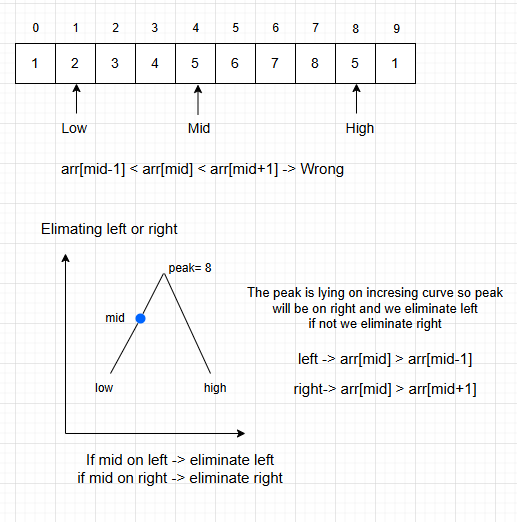

and if there are multiple peaks

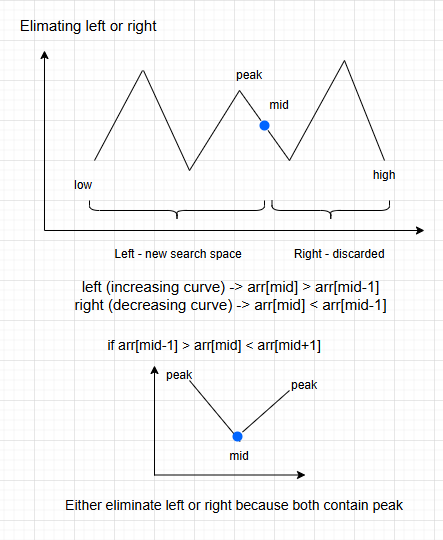

Consider the 2d array

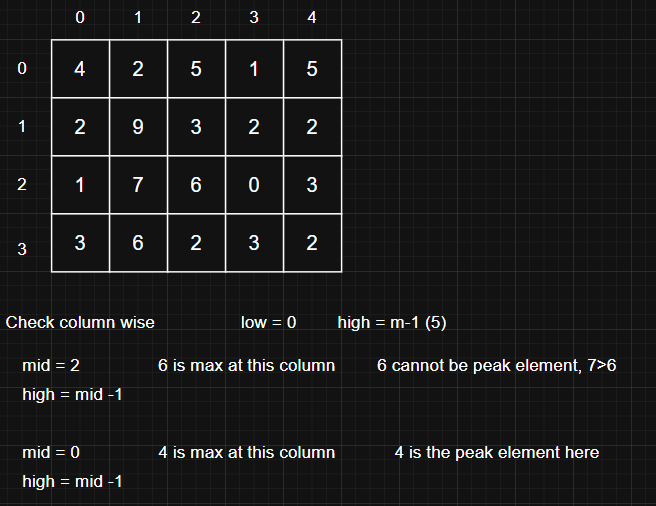

After we find the max we have to check at element right and left, top and bottom. For right and left, we will move low and high pointer and for top and bottom the fact that we are selecting max element will work

In [20]:
# Using binary search
n = len(mat)
m = len(mat[0])

def rowpeak(mat,n,mid):
    maxValue = -1
    rn = -1
    for i in range(n):
        if mat[i][mid] > maxValue:
            maxValue = mat[i][mid]
            rn = i
    return rn



def peak_binary(mat, n, m):
    low = 0
    high = m-1
    while low<=high:
        mid = int((low+high)/2)
        rn = rowpeak(mat,n,mid)
        left = mat[rn][mid-1] if (mid-1 >= 0) else -1
        right = mat[rn][mid+1] if (mid+1 < m) else -1
        if mat[rn][mid] > left and mat[rn][mid] > right:
            return [rn, mid]
        elif mat[rn][mid] < left:
            high = mid-1
        else:
            low = mid+1
        

print(peak_binary(mat,n,m))
# Time complexity: O(n log m)
# Space complexity: O(1)

[0, 0]
